## 4. Algorithmic question

#### A number n of kids are in a camp. Between some k pairs of them (a kid can be part of more than one pairs) there are often fights. At night there are two dormitories where the kids can sleep. We want, if possible, to assign each kid in one of the two dormitories in such a way that each pair of kids that fights often is assigned to a different dormitory. (There are no space problems and the two dormitories can have different number of kids.)

#### Give an algorithm that is linear in n and k that is able to answer whether such an assignment is possible and, if so, return one.

### Answer

The idea of the algorithm is to start from any node and mark it as Red, then visit all neighbors and mark as Black, then their neighbors which aren't visited yet will be Red, etc...
In this way, we will have split the graph into 2 subgraphs which will be the 2 groups of children.

### The algorithm

In [1]:
import networkx as nx
import random
from random import choice
import matplotlib.pyplot as plt
g = nx.Graph()
g.add_edge(1,4)
g.add_edge(1,6)
#g.add_edge(1,7) #---> If we add this edge, the graph can't be split into 2
g.add_edge(1,8)
g.add_edge(2,4)
g.add_edge(2,5)
g.add_edge(3,4)
g.add_edge(3,5)
g.add_edge(3,6)
g.add_edge(7,8)
g.add_edge(7,6)
g.add_edge(9,10)

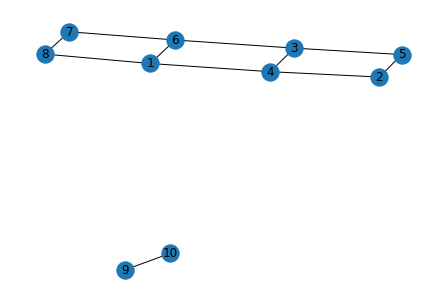

In [2]:
nx.draw(g, with_labels=True)
plt.show()

## Using BFS, and updating it to handle all extreme cases such as the graph being disconnected, and having odd cycles

In [3]:
def split(g):
    red=[]
    black=[]
    remaining= [x for x in list(g.nodes()) if (x not in red or x not in black)]
    while len(remaining)!=0: #use this loop to be able to do the split of all connected components of the graph
        s=random.choice(remaining) #start with a random node
        q=[] #create a queue
        visited={}
        for i in g.nodes(): #initialize visited as false for all nodes
            visited[i]=False
        visited[s]=True 
        red.append(s)
        q.append(s)
        remaining.remove(s)
        while not len(q)==0:
            s=q.pop(0)
            for u in g.adj[s]: #for every neighbor of s
                if visited[u]==False: #if it's not visited
                    visited[u]=True #mark as visited
                    if s in red:
                        black.append(u)
                        if any(a in black for a in g.adj[u]): #to check for errors, if there is any then we can't split
                #there's an error if two adjacent nodes have the same color, i.e. two children who fight are in the same group
                            return("Can't split")
                    else:
                        red.append(u)
                        if any(a in red for a in g.adj[u]):
                            return("Can't split")
                    q.append(u)
                    remaining.remove(u)
    return(print("The first group is:",red,"\nThe second group is:",black))


In [4]:
split(g)

The first group is: [2, 1, 3, 7, 10] 
The second group is: [4, 5, 6, 8, 9]
